In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from math import radians, cos, sin, asin, sqrt
import math

import pytz

df = pd.read_csv(r"C:\Users\Rakshitha\Downloads\taxi_fare.csv")


In [2]:
df



,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,2016-03-01 12:15:37,2016-03-01 12:38:53,1,-73.955688,40.782261,1,N,-73.974915,40.751282,1,16.0,0.0,0.5,3.36,0.00,0.3,20.16
212341,2,2016-03-01 12:15:37,2016-03-01 12:38:22,1,-74.002197,40.715042,1,N,-73.976295,40.739609,1,15.5,0.0,0.5,2.00,0.00,0.3,18.30
212342,2,2016-03-01 12:15:37,2016-03-01 12:18:18,1,-73.991173,40.733170,1,N,-73.994324,40.728531,1,4.0,0.0,0.5,0.00,0.00,0.3,4.80
212343,1,2016-03-01 12:15:38,2016-03-01 12:22:47,2,-73.972099,40.786446,1,N,-73.955872,40.779755,2,7.0,0.0,0.5,0.00,0.00,0.3,7.80


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               212345 non-null  int64  
 1   tpep_pickup_datetime   212345 non-null  object 
 2   tpep_dropoff_datetime  212345 non-null  object 
 3   passenger_count        212345 non-null  int64  
 4   pickup_longitude       212345 non-null  float64
 5   pickup_latitude        212345 non-null  float64
 6   RatecodeID             212345 non-null  int64  
 7   store_and_fwd_flag     212345 non-null  object 
 8   dropoff_longitude      212345 non-null  float64
 9   dropoff_latitude       212345 non-null  float64
 10  payment_type           212345 non-null  int64  
 11  fare_amount            212345 non-null  float64
 12  extra                  212345 non-null  float64
 13  mta_tax                212345 non-null  float64
 14  tip_amount             212345 non-nu

In [4]:
df.describe()

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000
mean,1.708338,1.766493,-73.112122,40.279405,1.034152,-73.144178,40.295648,1.324943,12.665588,0.048077,0.497662,1.809357,0.329049,0.299637,15.649355
std,0.454529,1.469647,7.936633,4.370714,0.494699,7.794599,4.293031,0.478255,10.875584,0.148103,0.037436,2.507419,2.028199,0.014094,13.592129
min,1.000000,0.000000,-121.933327,0.000000,1.000000,-121.933327,0.000000,1.000000,-52.000000,-0.500000,-0.500000,-2.700000,0.000000,-0.300000,-52.800000
25%,1.000000,1.000000,-73.990891,40.740292,1.000000,-73.990570,40.740089,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,2.000000,1.000000,-73.979469,40.755989,1.000000,-73.978691,40.755508,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.620000
75%,2.000000,2.000000,-73.963295,40.770283,1.000000,-73.964645,40.767475,2.000000,14.500000,0.000000,0.500000,2.360000,0.000000,0.300000,17.160000
max,2.000000,6.000000,0.000000,42.786934,99.000000,0.000000,42.786934,4.000000,819.500000,4.500000,0.500000,218.950000,661.080000,0.300000,832.800000


In [5]:

df.shape

(212345, 18)

In [6]:
# Check for nulls
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
# Haversine formula
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    return 6371 * c  # in km

# Feature Engineering
df['pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds() / 60

df['trip_distance'] = df.apply(lambda row: haversine(
    row['pickup_longitude'], row['pickup_latitude'],
    row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_day'] = df['pickup_datetime'].dt.day_name()
df['is_weekend'] = df['pickup_datetime'].dt.dayofweek >= 5
df['am_pm'] = df['pickup_datetime'].dt.strftime('%p')


df['is_night'] = df['pickup_hour'].apply(lambda x: x < 6 or x > 22)


In [9]:
df = df.drop(columns=['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
                      'pickup_datetime', 'dropoff_datetime', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',],axis=1)

In [10]:
df



,VendorID,passenger_count,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,trip_distance,pickup_hour,pickup_day,is_weekend,am_pm,is_night
0,1,1,1,N,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,7.916667,3.138096,0,Tuesday,False,AM,True
1,1,1,1,N,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,11.100000,4.303331,0,Tuesday,False,AM,True
2,2,2,1,N,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,31.100000,16.600142,0,Tuesday,False,AM,True
3,2,3,1,N,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,0.000000,9.046547,0,Tuesday,False,AM,True
4,2,5,3,N,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,0.000000,20.400022,0,Tuesday,False,AM,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,1,1,N,1,16.0,0.0,0.5,3.36,0.00,0.3,20.16,23.266667,3.806279,12,Tuesday,False,PM,False
212341,2,1,1,N,1,15.5,0.0,0.5,2.00,0.00,0.3,18.30,22.750000,3.496576,12,Tuesday,False,PM,False
212342,2,1,1,N,1,4.0,0.0,0.5,0.00,0.00,0.3,4.80,2.683333,0.580119,12,Tuesday,False,PM,False
212343,1,2,1,N,2,7.0,0.0,0.5,0.00,0.00,0.3,7.80,7.150000,1.555737,12,Tuesday,False,PM,False


# ------------------- EDA Plots ------------------------

In [11]:
df = df.drop(columns=['fare_amount', 'extra', 'tip_amount', 'payment_type','tolls_amount','mta_tax','improvement_surcharge','store_and_fwd_flag',"RatecodeID"])

In [12]:
numerical_cols = df.select_dtypes(exclude='object').columns
numerical_cols


Index(['VendorID', 'passenger_count', 'total_amount', 'trip_duration',
       'trip_distance', 'pickup_hour', 'is_weekend', 'is_night'],
      dtype='object')

# OUTLIERS

In [13]:
import numpy as np

# Select only numeric columns (exclude datetime or object)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns


for col in numerical_cols:

    Q1 = df[col].quantile(0.25)  # 25th percentile
    Q3 = df[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range

    # Define lower and upper bound
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values at lower and upper bound
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])



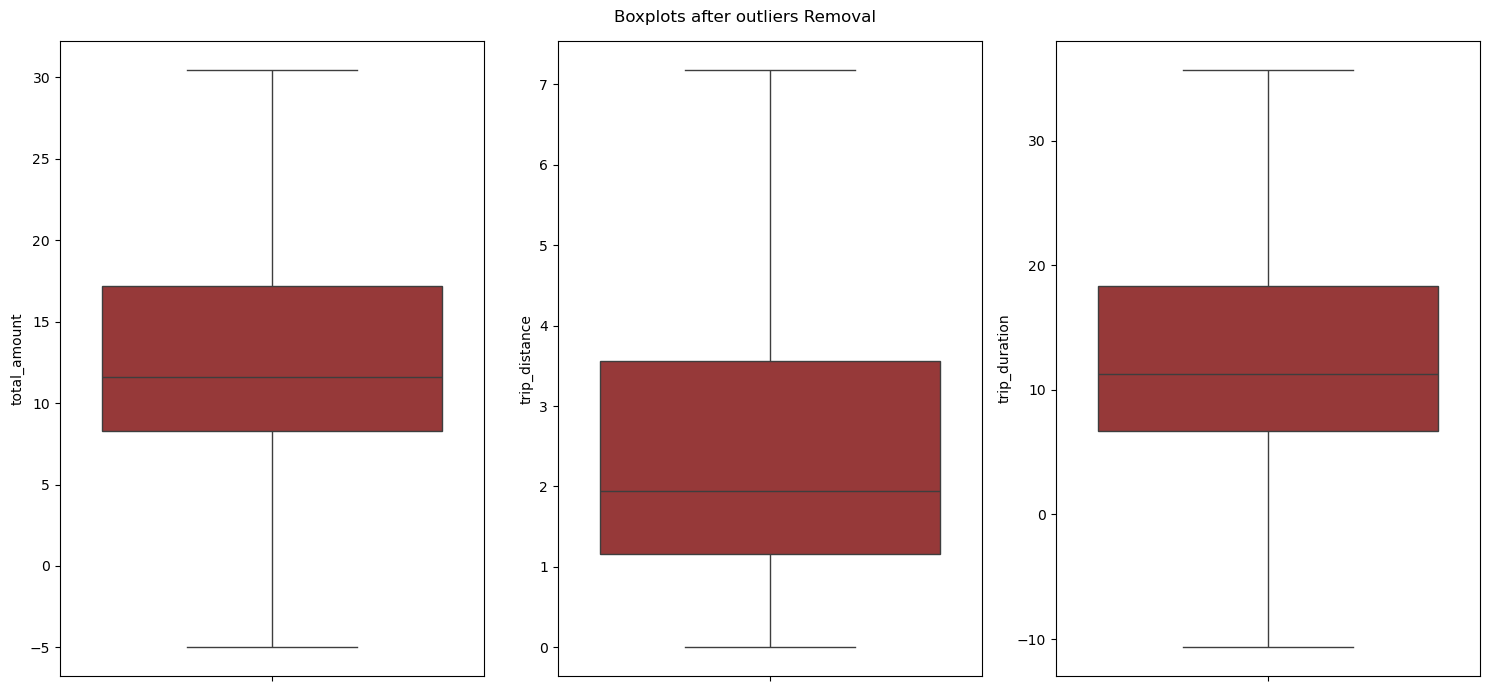

In [14]:
columns_to_clean = [
      
    'total_amount', 'trip_distance', 'trip_duration'
]
plt.figure(figsize=(15, 7))
plt.suptitle("Boxplots after outliers Removal")
for i in range(0, len(columns_to_clean)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[columns_to_clean[i]],color='brown')
    plt.tight_layout()
    

In [15]:
skewness = df[columns_to_clean].skew()
skewness


total_amount     1.024187
trip_distance    1.078316
trip_duration    0.957894
dtype: float64

# Apply Log Transform to Positively Skewed Columns






In [16]:
pos_skewed_cols = ['trip_duration','total_amount','trip_distance']
# Safeguard against invalid values before applying log1p
df[pos_skewed_cols] = df[pos_skewed_cols].clip(lower=0)
df[pos_skewed_cols] = df[pos_skewed_cols].fillna(0)
df[pos_skewed_cols] = df[pos_skewed_cols].apply(np.log1p)


In [17]:
print(df[pos_skewed_cols].isnull().sum())



trip_duration    0
total_amount     0
trip_distance    0
dtype: int64


# ENCODING

In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
nominal_data = [  'VendorID', 'pickup_day',]

# Define One-Hot Encoder
ohe = OneHotEncoder(drop='first', handle_unknown='ignore')


# Fit and Transform
encoded_array = ohe.fit_transform(df[nominal_data]).toarray()

# Convert Encoded Data to DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(nominal_data))
encoded_df = encoded_df.astype(int)


# Concatenate with Original DataFrame (Drop Original Categorical Columns)
df = pd.concat([df.drop(columns=nominal_data), encoded_df], axis=1)

In [20]:
df.head()

,passenger_count,total_amount,trip_duration,trip_distance,pickup_hour,is_weekend,am_pm,is_night,VendorID_2.0,pickup_day_Tuesday
0,1.0,2.591516,2.187922,1.420236,0,False,AM,True,0,1
1,1.0,2.794228,2.493205,1.668335,0,False,AM,True,0,1
2,2.0,3.448399,3.468856,2.101831,0,False,AM,True,1,1
3,3.0,3.448399,0.000000,2.101831,0,False,AM,True,1,1
4,3.5,3.448399,0.000000,2.101831,0,False,AM,True,1,1


# scaling


In [21]:
from sklearn.preprocessing import StandardScaler


columns_to_scale = [
    'total_amount', 'trip_distance', 'trip_duration',
    'passenger_count', 
]

# Scale
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [22]:
df['is_weekend'] = df['is_weekend'].astype(int)
df['is_night'] = df['is_night'].astype(int)


In [23]:
df['am_pm'] = df['am_pm'].map({'AM': 0, 'PM': 1})

In [24]:
df.head()

,passenger_count,total_amount,trip_duration,trip_distance,pickup_hour,is_weekend,am_pm,is_night,VendorID_2.0,pickup_day_Tuesday
0,-0.585434,0.020345,-0.452796,0.494549,0,0,0,1,0,1
1,-0.585434,0.446146,0.014767,0.966253,0,0,0,1,0,1
2,0.515581,1.820249,1.509043,1.790446,0,0,0,1,1,1
3,1.616596,1.820249,-3.803749,1.790446,0,0,0,1,1,1
4,2.167104,1.820249,-3.803749,1.790446,0,0,0,1,1,1


In [25]:
corr_matrix = df.select_dtypes(include=['number']).corr()


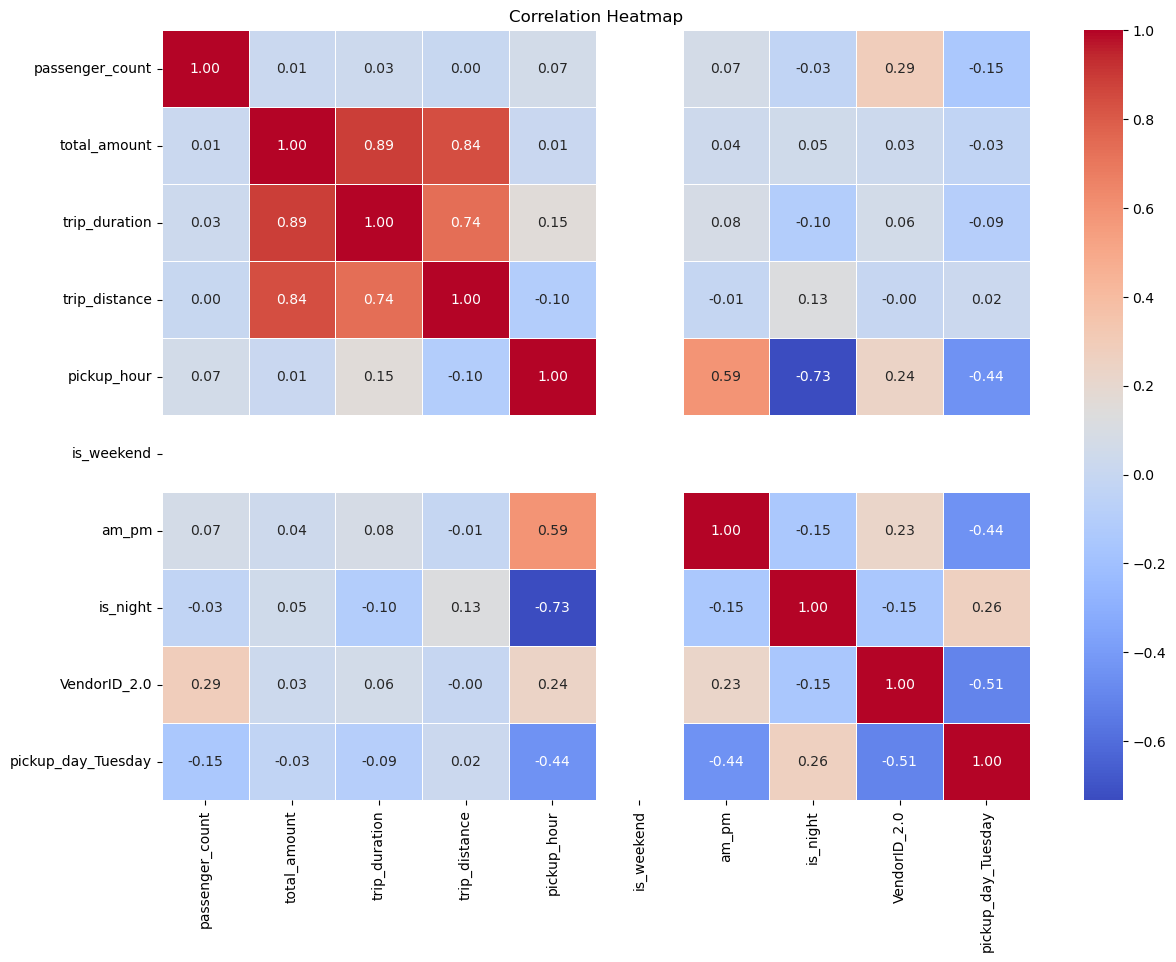

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [27]:
# Sort correlation with target variable
corr_with_target = corr_matrix['total_amount'].sort_values(ascending=False)
print(corr_with_target)


total_amount          1.000000
trip_duration         0.891483
trip_distance         0.838364
is_night              0.047664
am_pm                 0.035643
VendorID_2.0          0.026242
passenger_count       0.013123
pickup_hour           0.007885
pickup_day_Tuesday   -0.034149
is_weekend                 NaN
Name: total_amount, dtype: float64


In [28]:
df.corr()['total_amount'].abs().sort_values(ascending=False)



total_amount          1.000000
trip_duration         0.891483
trip_distance         0.838364
is_night              0.047664
am_pm                 0.035643
pickup_day_Tuesday    0.034149
VendorID_2.0          0.026242
passenger_count       0.013123
pickup_hour           0.007885
is_weekend                 NaN
Name: total_amount, dtype: float64

In [29]:
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [30]:
X = df.drop('total_amount', axis=1)
y = df['total_amount']


In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [32]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "Ridge Regression" : Ridge ()
}
# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data

    # Compute evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
results_df

,MAE,MSE,RMSE,R2 Score
Linear Regression,0.214756,0.128073,0.357873,0.872048
Decision Tree Regressor,0.244107,0.163790,0.404709,0.836365
Random Forest Regressor,0.191424,0.094810,0.307913,0.905279
XGBoost Regressor,0.184472,0.088052,0.296736,0.912031
Ridge Regression,0.214757,0.128073,0.357873,0.872048


In [33]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Define the model
xgb = XGBRegressor(n_estimators=100, random_state=42)

# Define K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform Cross-Validation
cv_scores = cross_val_score(xgb, X, y, cv=kf, scoring='r2')

# Print all 5 scores
print(f"All 5-Fold Scores: {cv_scores}")
print()
# Compare Mean and Standard Deviation
print(f"Mean R2 Score: {np.mean(cv_scores):.4f}")

All 5-Fold Scores: [0.91099272 0.91151257 0.91116322 0.91283657 0.91241052]

Mean R2 Score: 0.9118


In [34]:
import numpy as np

from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import mean_squared_error

# 1. Generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# 2. Define parameter distribution (✅ Poisson removed)
param_dist = {
    "max_depth": [3, None],
    "max_features": randint(1, 21),
    "min_samples_leaf": randint(1, 10),
    "criterion": ["squared_error", "friedman_mse", "absolute_error"]  # ✅ valid for all y
}

# 3. Setup model
tree = DecisionTreeRegressor(random_state=42)

# 4. Randomized Search with 5-fold CV
tree_cv = RandomizedSearchCV(
    estimator=tree,
    param_distributions=param_dist,
    cv=5,
    n_iter=20,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1  # parallelize to speed up
)

# 5. Fit search
tree_cv.fit(X, y)

# 6. Print best results
print("✅ Tuned Decision Tree Parameters:", tree_cv.best_params_)
print("📉 Best CV MSE (negative):", tree_cv.best_score_)

# 7. Optional: Evaluate on full data
best_model = tree_cv.best_estimator_
y_pred = best_model.predict(X)
mse = mean_squared_error(y, y_pred)
print("📊 Final MSE on full data:", mse)


✅ Tuned Decision Tree Parameters: {'criterion': 'squared_error', 'max_depth': None, 'max_features': 12, 'min_samples_leaf': 9}
📉 Best CV MSE (negative): -18132.546600176367
📊 Final MSE on full data: 7047.62295479205


In [35]:
# Now select only numeric columns
df_model = df.select_dtypes(include=['int64', 'float64'])

# Define X and y
X = df_model.drop('total_amount', axis=1)
y = df_model['total_amount']

# Train the model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X, y)


RandomForestRegressor()

In [36]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
y = df['total_amount']
X = df.drop('total_amount', axis=1)

model = RandomForestRegressor()
model.fit(X, y)


# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False)
print(top_features.head(10))


trip_duration         0.779612
trip_distance         0.192977
pickup_hour           0.014377
passenger_count       0.005480
VendorID_2.0          0.003209
pickup_day_Tuesday    0.002448
is_night              0.001044
am_pm                 0.000852
is_weekend            0.000000
dtype: float64


In [37]:
X.columns


Index(['passenger_count', 'trip_duration', 'trip_distance', 'pickup_hour',
       'is_weekend', 'am_pm', 'is_night', 'VendorID_2.0',
       'pickup_day_Tuesday'],
      dtype='object')

In [38]:
import os
import pickle

if os.path.exists("xgb_model.pkl"):
    with open("xgb_model.pkl", "rb") as file:
        model = pickle.load(file)
    print("✅ Model loaded successfully!")
else:
    print("❌ Model file not found!")


❌ Model file not found!


In [39]:
import pickle

with open(r"C:\Users\Rakshitha\TRIP PROJECT\xgb_model.pkl", "rb") as file:
    model = pickle.load(file)
